# Week 1 (05 Sep 2022) - Intro

### Question 1

What's the version of NumPy that you installed?

You can get the version information using the `__version__` field.

In [1]:
import numpy as np

In [2]:
np.__version__

'1.23.2'

### Question 2

How many records are in the dataset?

In [3]:
import pandas as pd

df = pd.read_csv('./resources/car-prices.csv')

In [4]:
df.shape[0]

11914

### Question 3

Who are the most frequent car manufacturers (top-3) according to the dataset?

> **Note**: You should rely on "Make" column in this question.

In [5]:
# Group by manufacturer
df_top_manufacturers = df.groupby(df['Make'])
# Count the rows in each group
df_top_manufacturers = df_top_manufacturers.size()
# Sort by count in descending order
df_top_manufacturers = df_top_manufacturers.sort_values(ascending=False)
# Take only the top 3 manufacturers
df_top_manufacturers = df_top_manufacturers.head(3)

df_top_manufacturers

Make
Chevrolet     1123
Ford           881
Volkswagen     809
dtype: int64

### Question 4

What's the number of unique Audi car models in the dataset?

In [6]:
# Get only Audi cars
df_audi_count = df[df['Make'] == 'Audi']

# Get number of unique values in the 'Model' column (= number og unique models)
df_audi_count['Model'].nunique()

34

### Question 5

How many columns in the dataset have missing values?

In [7]:
# Check if a column has at least one null value
df_nullable_cols = df.isna().any()
# Consider only columns that do
df_nullable_cols = df_nullable_cols[df_nullable_cols]

# Count them
df_nullable_cols.count()

5

### Question 6

1. Find the median value of "Engine Cylinders" column in the dataset.
2. Next, calculate the most frequent value of the same "Engine Cylinders".
3. Use the `fillna` method to fill the missing values in "Engine Cylinders" with the most frequent value from the previous step.
4. Now, calculate the median value of "Engine Cylinders" once again.

Has it changed?

> Hint: refer to existing `mode` and `median` functions to complete the task.

In [8]:
df['Engine Cylinders'].median()

6.0

In [9]:
df['Engine Cylinders'].mode()

0    4.0
Name: Engine Cylinders, dtype: float64

In [10]:
df_filled_cylinders = df.fillna({'Engine Cylinders': 4.0})

df_filled_cylinders

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [11]:
df_filled_cylinders['Engine Cylinders'].median()

6.0

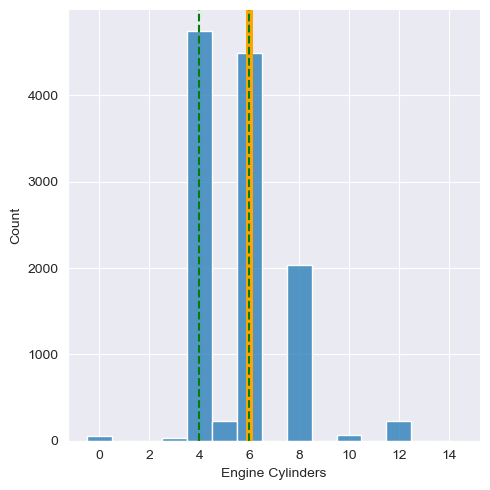

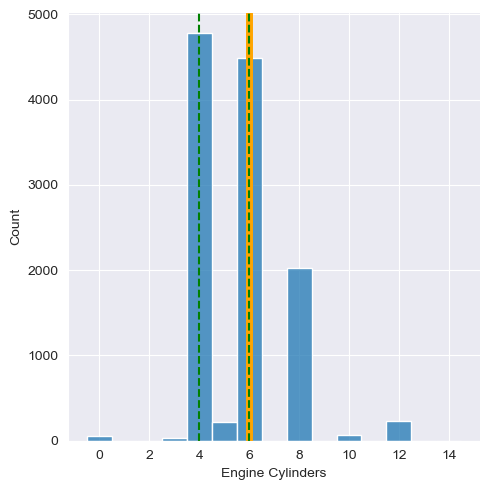

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


def specs(x, **_):
    plt.axvline(np.nanquantile(x, 0.25), c='green', ls='--', lw=1.5)
    plt.axvline(x.median(), c='orange', ls='-', lw=5)
    plt.axvline(np.nanquantile(x, 0.75), c='green', ls='--', lw=1.5)


o = sns.displot(
    data=df, x='Engine Cylinders',
    facet_kws=dict(sharey=False, sharex=False),
    bins=np.arange(df['Engine Cylinders'].min(), df['Engine Cylinders'].max())-0.5,
)
n = sns.displot(
    data=df_filled_cylinders, x='Engine Cylinders',
    facet_kws=dict(sharey=False, sharex=False),
    bins=np.arange(df_filled_cylinders['Engine Cylinders'].min(), df_filled_cylinders['Engine Cylinders'].max())-0.5,
)

o.map(specs, 'Engine Cylinders')
n.map(specs, 'Engine Cylinders')

### Question 7

1. Select all the "Lotus" cars from the dataset.
2. Select only columns "Engine HP", "Engine Cylinders".
3. Now drop all duplicated rows using `drop_duplicates` method (you should get a dataframe with 9 rows).
4. Get the underlying NumPy array. Let's call it `X`.
5. Compute matrix-matrix multiplication between the transpose of `X` and `X`. To get the transpose, use `X.T`. Let's call the result `XTX`.
6. Invert `XTX`.
7. Create an array `y` with values `[1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800]`.
8. Multiply the inverse of `XTX` with the transpose of `X`, and then multiply the result by `y`. Call the result `w`.
9. What's the value of the first element of `w`?

> **Note**: You just implemented linear regression. We'll talk about it in the next lesson.

In [13]:
df_lotus = df[df['Make'] == 'Lotus']
df_lotus

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
3912,Lotus,Elise,2009,premium unleaded (required),189.0,4.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,27,21,613,43995
3913,Lotus,Elise,2009,premium unleaded (required),218.0,4.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,26,20,613,54990
3914,Lotus,Elise,2009,premium unleaded (required),189.0,4.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,27,21,613,47250
3915,Lotus,Elise,2010,premium unleaded (required),189.0,4.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,27,21,613,47250
3916,Lotus,Elise,2010,premium unleaded (required),218.0,4.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,26,20,613,54990
3917,Lotus,Elise,2011,premium unleaded (required),189.0,4.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,27,21,613,51845
3918,Lotus,Elise,2011,premium unleaded (required),217.0,4.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,26,20,613,54990
3919,Lotus,Elise,2011,premium unleaded (required),217.0,4.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,26,20,613,57950
4216,Lotus,Esprit,2002,premium unleaded (required),350.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,21,14,613,89825
4217,Lotus,Esprit,2003,premium unleaded (required),350.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,21,14,613,90825


In [14]:
df_lotus_engines = df_lotus[['Engine HP', 'Engine Cylinders']]
df_lotus_engines

,Engine HP,Engine Cylinders
3912,189.0,4.0
3913,218.0,4.0
3914,189.0,4.0
3915,189.0,4.0
3916,218.0,4.0
3917,189.0,4.0
3918,217.0,4.0
3919,217.0,4.0
4216,350.0,8.0
4217,350.0,8.0


In [15]:
df_lotus_engines = df_lotus_engines.drop_duplicates()
df_lotus_engines

,Engine HP,Engine Cylinders
3912,189.0,4.0
3913,218.0,4.0
3918,217.0,4.0
4216,350.0,8.0
4257,400.0,6.0
4259,276.0,6.0
4262,345.0,6.0
4292,257.0,4.0
4293,240.0,4.0


In [16]:
X = df_lotus_engines.to_numpy()
X

array([[189.,   4.],
       [218.,   4.],
       [217.,   4.],
       [350.,   8.],
       [400.,   6.],
       [276.,   6.],
       [345.,   6.],
       [257.,   4.],
       [240.,   4.]])

In [17]:
XTX = np.matmul(X.T, X)
XTX

array([[7.31684e+05, 1.34100e+04],
       [1.34100e+04, 2.52000e+02]])

In [18]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 5.53084235e-05, -2.94319825e-03],
       [-2.94319825e-03,  1.60588447e-01]])

In [19]:
y = [1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800]
y

[1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800]

In [20]:
XTXiXT = np.matmul(XTX_inv, X.T)
XTXiXT

array([[-1.31950096e-03,  2.84443321e-04,  2.29134897e-04,
        -4.18763778e-03,  4.46417989e-03, -2.39406462e-03,
         1.42221660e-03,  2.44147184e-03,  1.50122864e-03],
       [ 8.60893170e-02,  7.36567735e-04,  3.67976598e-03,
         2.54588185e-01, -2.13748621e-01,  1.51207962e-01,
        -5.18727169e-02, -1.14048164e-01, -6.40137937e-02]])

In [21]:
w = np.matmul(XTXiXT, y)
w

array([  4.59494481, -63.56432501])

In [22]:
w[0]

4.5949448100945744